# Palmer Archipelago (Antarctica) penguin data
**penguins_size.csv**

Contains variables:

- **species**: penguin species (Chinstrap, Adélie, or Gentoo)
- **culmen_length_mm**: culmen length (mm)
- **culmen_depth_mm**: culmen depth (mm)
- **flipper_length_mm**: flipper length (mm)
- **body_mass_g**: body mass (g)
- **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- **sex**: penguin sex

### Our goal will be to produce a model able to classify the penguins into two different species.

# 1.0 Imports

In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 2.0 Load Dataset

In [2]:
#load csv file
df = pd.read_csv('penguins_size.csv')

In [3]:
#removing Chinstrap rows, so the dataset will have only two possible values for the target
df.drop(df[df['species'] == 'Chinstrap'].index, axis='rows', inplace=True)

In [4]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            276 non-null    object 
 1   island             276 non-null    object 
 2   culmen_length_mm   274 non-null    float64
 3   culmen_depth_mm    274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   sex                266 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.2+ KB


# 3.0 Quick view into dataset

## 3.1 Identifying Categorical and Numerical features

In [6]:
df_categorical = df.select_dtypes(include='object').columns
print(f'Categorical features: {df_categorical.values}')

Categorical features: ['species' 'island' 'sex']


In [7]:
df_numerical = df.select_dtypes(exclude='object').columns
print(f'Numerical features: {df_categorical.values}')

Numerical features: ['species' 'island' 'sex']


## 3.2 Scaling analysis

In [8]:
df.select_dtypes(exclude='object').describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693
std,5.195566,2.013410,15.047938,835.933105
min,32.100000,13.100000,172.000000,2850.000000
25%,38.350000,15.000000,190.000000,3600.000000
50%,42.000000,17.000000,198.000000,4262.500000
75%,46.675000,18.500000,215.000000,4950.000000
max,59.600000,21.500000,231.000000,6300.000000


**Analysing min. and max. values for the numerical features in the dataset, it looks like there won't be any scaling related issues.**


## 3.3 Finding NULL values

In [9]:
df.isna().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

## 3.4 Proportionality of categorical features

<Axes: >

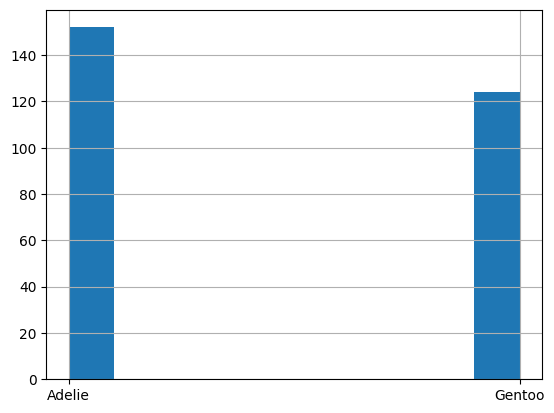

In [10]:
df['species'].hist()

<Axes: >

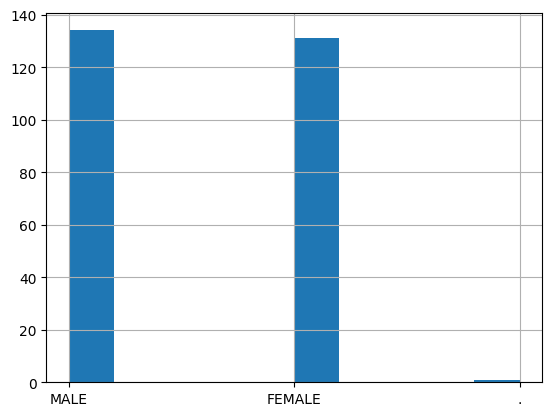

In [11]:
df['sex'].hist()

'Sex' feature has some rows with '.' as value. This will have to be fixed.

<Axes: >

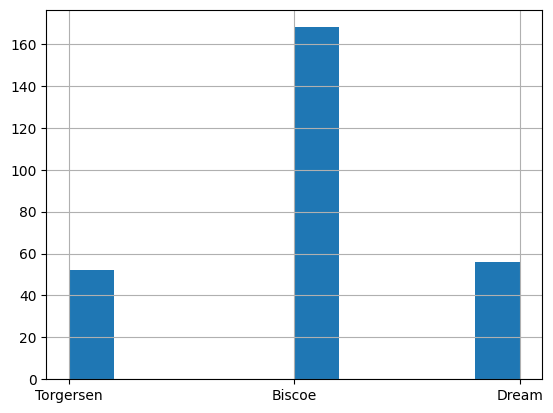

In [12]:
df['island'].hist()

# 4.0 Split data

In [13]:
#splitting data into train and test subsets
X_train, X_test = train_test_split(df, test_size=0.2, stratify=df['species'], random_state=42)

In [14]:
X_train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
136,Adelie,Dream,35.6,17.5,191.0,3175.0,FEMALE
117,Adelie,Torgersen,37.3,20.5,199.0,3775.0,MALE
84,Adelie,Dream,37.3,17.8,191.0,3350.0,FEMALE
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [15]:
X_test.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
87,Adelie,Dream,36.9,18.6,189.0,3500.0,FEMALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
247,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,MALE
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,FEMALE
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE


# 5.0 PreProcessing Data

## 5.1 NA/NULL values (in numerical features)

In [16]:
#listing features with null values
X_train.isna().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

- Since most of the features have null values, removing these features is not option.
- Given this, for numerical features we will fill NA/NULL values with median.

In [17]:
#defining a function to fill NULL values with median values
def fill_numerical_nulls(dataframe, numeric_cols):
    """
    Fill numerical features having NULL values, with 'median'
    value for each feature.
    """
    df_copy_numeric = dataframe[numeric_cols]
    imputer = SimpleImputer(strategy='median')
    df_prep = imputer.fit_transform(df_copy_numeric)
    df_prep = pd.DataFrame(df_prep, columns=df_copy_numeric.columns, index=df_copy_numeric.index)
    for col in numeric_cols:
        dataframe[col] = df_prep[col]
    return dataframe

In [18]:
#apply function
x_train_copy = X_train.copy()
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X_train_prep = fill_numerical_nulls(x_train_copy, num_cols)

In [19]:
#check if NULL values still exist
X_train_prep.isna().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                   True
dtype: bool

## 5.2 NA/NULL values (in categorical features)
'Sex' feature is special since it is a categorical feature having some NULL values.

In addition, some rows have '.' as value.

In [20]:
#df copy for analysis
x_copy = X_train_prep.copy()

In [21]:
#check all unique existing values for sex feature
x_copy['sex'].unique()

array(['FEMALE', 'MALE', nan, '.'], dtype=object)

In [22]:
#explore proportionality with more detailed
df_sex_null = x_copy['sex'].isna()

print(f"MALE samples.....: {len(x_copy[x_copy['sex'] == 'MALE'])}")
print(f"FEMALE samples...: {len(x_copy[x_copy['sex'] == 'FEMALE'])}")
print(f"NULL samples.....: {df_sex_null.loc[df_sex_null == True].count()}")
print(f". samples........: {len(x_copy[x_copy['sex'] == '.'])}")

MALE samples.....: 106
FEMALE samples...: 104
NULL samples.....: 9
. samples........: 1


Being only 10 samples, rows with sex = '.' or sex = NaN, will be removed

In [23]:
def remove_sex_nulls(dataframe):
    #get indexes for NULL or '.' rows
    df_sex_remove = dataframe[(dataframe['sex'] != 'MALE') & (dataframe['sex'] != 'FEMALE')]

    #remove that indexes from dataframe
    dataframe.drop(df_sex_remove.index, inplace=True)
    return dataframe

In [24]:
X_train_prep = remove_sex_nulls(X_train_prep)

Now, there is not any NULL values in our dataset

In [25]:
X_train_prep.isna().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

## 5.3 Categorical features conversion
Categorical values need to be converted to numerical values.

Since there are only a few possible values for categorical features (2 for SEX, and 3 for ISLAND), we will be using get_dummies method.

In [26]:
def convert_to_numerical(dataframe, columns):
    df_copy = dataframe.copy()
    for col in columns:
        df_prep = pd.get_dummies(dataframe[col])
        df_copy = pd.concat([df_copy, df_prep], axis='columns')
        df_copy.drop([col], axis='columns', inplace=True)
    return df_copy

In [27]:
#preview dataframa before apply get_dummies function
X_train_prep

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
136,Adelie,Dream,35.6,17.5,191.0,3175.0,FEMALE
117,Adelie,Torgersen,37.3,20.5,199.0,3775.0,MALE
84,Adelie,Dream,37.3,17.8,191.0,3350.0,FEMALE
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
...,...,...,...,...,...,...,...
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,FEMALE
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,FEMALE
284,Gentoo,Biscoe,45.8,14.2,219.0,4700.0,FEMALE
137,Adelie,Dream,40.2,20.1,200.0,3975.0,MALE


In [28]:
copy = X_train_prep.copy()
copy = convert_to_numerical(copy, ['sex', 'island'])
X_train_prep = copy

In [29]:
X_train_prep

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
136,Adelie,35.6,17.5,191.0,3175.0,1,0,0,1,0
117,Adelie,37.3,20.5,199.0,3775.0,0,1,0,0,1
84,Adelie,37.3,17.8,191.0,3350.0,1,0,0,1,0
283,Gentoo,54.3,15.7,231.0,5650.0,0,1,1,0,0
268,Gentoo,44.9,13.3,213.0,5100.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
228,Gentoo,43.3,13.4,209.0,4400.0,1,0,1,0,0
16,Adelie,38.7,19.0,195.0,3450.0,1,0,0,0,1
284,Gentoo,45.8,14.2,219.0,4700.0,1,0,1,0,0
137,Adelie,40.2,20.1,200.0,3975.0,0,1,0,1,0


SPECIES is the target of this dataset, so instead of using get_dummies which would create new columns in our dataset, we will apply Pandas factorizing method.

This will convert each possible value to 0 or 1.

In [30]:
def species_to_numeric(dataframe):
    """
    Returns dataframe with 'species' feature transformed into numerical
    """
    codes, uniques = pd.factorize(dataframe.species)
    dataframe.species = codes
    return dataframe

In [31]:
X_train_prep = species_to_numeric(X_train_prep)
X_train_prep

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
136,0,35.6,17.5,191.0,3175.0,1,0,0,1,0
117,0,37.3,20.5,199.0,3775.0,0,1,0,0,1
84,0,37.3,17.8,191.0,3350.0,1,0,0,1,0
283,1,54.3,15.7,231.0,5650.0,0,1,1,0,0
268,1,44.9,13.3,213.0,5100.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
228,1,43.3,13.4,209.0,4400.0,1,0,1,0,0
16,0,38.7,19.0,195.0,3450.0,1,0,0,0,1
284,1,45.8,14.2,219.0,4700.0,1,0,1,0,0
137,0,40.2,20.1,200.0,3975.0,0,1,0,1,0


## After all this preprocessing, we have a dataframe (X_TRAIN_PREP) with:
- Only two different values for dataframe target (species)
- No null values (filled with median when they were numerical, or removed if categorical)
- No invalid values (removed)
- Categorical values converted to numerical values

# 6.0 Generate X and y (TRAIN SUBSET)

In [32]:
y_train_prep = X_train_prep.species
X_train_prep = X_train_prep.drop(['species'], axis='columns')

# 7.0 Preprocessing test subset

In [33]:
#fill null values
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X_test_prep = fill_numerical_nulls(X_test, num_cols)
X_test_prep.isna().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                   True
dtype: bool

In [34]:
#remove 'sex' feature nulls
X_test_prep = remove_sex_nulls(X_test_prep)
X_test_prep.isna().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [35]:
#convert categorical to numerical
X_test_prep = convert_to_numerical(X_test_prep, ['sex', 'island'])
X_test_prep.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
87,Adelie,36.9,18.6,189.0,3500.0,1,0,0,1,0
58,Adelie,36.5,16.6,181.0,2850.0,1,0,1,0,0
247,Gentoo,47.8,15.0,215.0,5650.0,0,1,1,0,0
116,Adelie,38.6,17.0,188.0,2900.0,1,0,0,0,1
20,Adelie,37.8,18.3,174.0,3400.0,1,0,1,0,0


In [36]:
#convert SPECIES to numeric using factorize method from Pandas
X_test_prep = species_to_numeric(X_test_prep)
X_test_prep.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
87,0,36.9,18.6,189.0,3500.0,1,0,0,1,0
58,0,36.5,16.6,181.0,2850.0,1,0,1,0,0
247,1,47.8,15.0,215.0,5650.0,0,1,1,0,0
116,0,38.6,17.0,188.0,2900.0,1,0,0,0,1
20,0,37.8,18.3,174.0,3400.0,1,0,1,0,0


# 8.0 Creating X and y for TEST SUBSET

In [37]:
y_test_prep = X_test_prep.species
X_test_prep = X_test_prep.drop(['species'], axis='columns')

## Similar to TRAIN subset preprocessing, we have a dataframe (X_TEST_PREP) with:
- Only two different values for dataframe target (species)
- No null values (filled with median when they were numerical, or removed if categorical)
- No invalid values (removed)
- Categorical values converted to numerical values

# 9.0 Creating and Training SVM model
This model will try to determine pinguins specie based on some measurements

In [38]:
#instantiate model
clf = SVC(kernel='linear')

#fit model
clf.fit(X_train_prep, y_train_prep)

SVC(kernel='linear')

In [39]:
#predict values for test subset
y_pred = clf.predict(X_test_prep)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

# 10.0 Score the model

In [40]:
cm = confusion_matrix(y_test_prep, y_pred)
cm

array([[31,  0],
       [ 0, 24]])

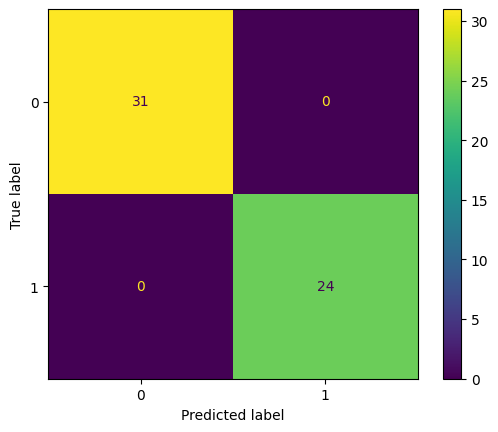

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()